In [1]:
# Installations
!pip install torch torchvision datasets

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [2]:
# Imports
import torch
from torchvision import datasets, transforms as T
import matplotlib.pyplot as plt

In [3]:
# device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

# Load Dataset

In [4]:
# define transforms
transform = T.Compose([T.ToTensor(), T.Normalize((0.5,), (0.5,))])

In [5]:
train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='data', train=False, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 31573771.81it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1081597.67it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 8952111.92it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4526141.31it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [6]:
train_dataset, test_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.5,), std=(0.5,))
            ),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.5,), std=(0.5,))
            ))

Image shape: torch.Size([1, 28, 28])
Label: 5


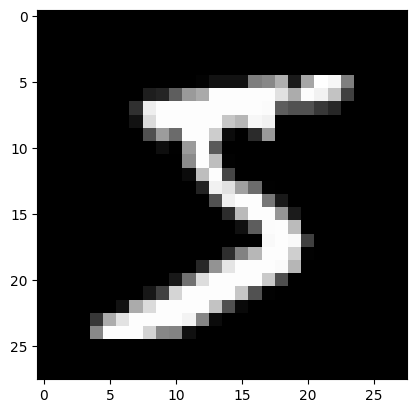

In [7]:
'''
NOTE:
- MNIIST dataset has gray images (c = 1, h = 28, w = 28)
- plt.imshow() expects (h, w) for grag images and (h, w, c) for color images
- .squeeze() removes the channel dimension and therefore we will use it.
'''

image, label = train_dataset[0]

print(f'Image shape: {image.shape}')
print(f'Label: {label}')
plt.imshow(image.squeeze(), cmap='gray')



# DataLoader
- DataLoader is a Pytorch module that helps in customized loading of data to model. they efficiently handle the process of feeding data into models during training and evaluation.
- DataLoader creates a iteratable objectof data

In [8]:
from torch.utils.data import DataLoader

trainloader = DataLoader(train_dataset, batch_size = 64, shuffle = True)
testloader = DataLoader(test_dataset, batch_size = 64, shuffle = True)



In [13]:
'''
NOTE:
- Number of batches in loader is given as,
Batches = total number of samlpes/Batch size
- So for training Batches, Train_batch = 60000/64  we have 938 batches and for testing Batches, Test_batch = 10000/64 = 157
'''
len(trainloader), len(testloader)

(938, 157)

In [22]:
'''
NOTE:
- Before we analyze DataLoder further lets talk about next() and iter() for next 3 to 4 cells.
- An Iterable is an object that can be iterated over. List,dictionory and tuples are iterables.
- An iterator (iter()) is an object that allows you to iterate over a collection of elements, such as a list.
- The iter() function is used to create an iterator from an iterable.
- The next() function is used to retrieve the next element from an iterator.
- When you reach the end of the iterator, it raises a StopIteration exception.
- Lets see how it works.
'''

my_list = [1, 2]
iterator = iter(my_list)  # Create an iterator from the list

print(next(iterator))

1


In [23]:
print(next(iterator))

2


In [ ]:
'''
NOTE:
- Our iterable object (list) has 2 values therfore now next(iterator) will raise stopiterator flag
- uncomment to check
'''
#print(next(iterator))

Image shape: torch.Size([64, 1, 28, 28])
Label: torch.Size([64])
-------------------------------------
Label: 1


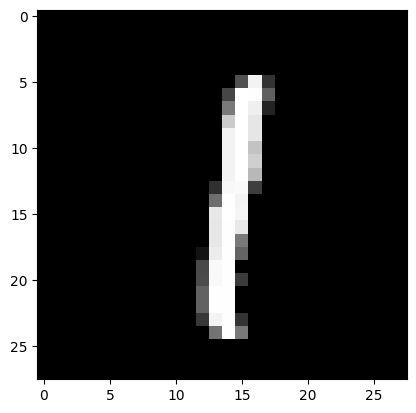

In [30]:
'''
- next and iter are used with dataloader for several reasons like
1. Data Inspection
2. Batch Processing
3. Debugging
4. Visualizing Data

-lets see
- after  running this code you can see that image has 1 in it and its label is also 1. (Inspeciton)
- we also ploted image (Visualization Data)
'''

# lets Inspect batch
image, label = next(iter(trainloader))
print(f'Image shape: {image.shape}')
print(f'Label: {label.shape}')
print('-------------------------------------')
plt.imshow(image[0].squeeze(), cmap='gray')
print(f'Label: {label[0]}')

In [33]:
print(label)

tensor([1, 7, 8, 2, 3, 5, 2, 9, 5, 3, 1, 1, 1, 4, 7, 0, 6, 1, 2, 0, 6, 2, 3, 5,
        3, 6, 9, 4, 8, 6, 5, 5, 5, 8, 6, 6, 2, 6, 5, 1, 7, 1, 6, 7, 6, 7, 7, 9,
        7, 1, 1, 6, 0, 6, 3, 6, 8, 7, 4, 3, 7, 2, 2, 0])


# Model
- Our Task is Image Classification, Our Network will be as following:
   
   Input (BS, C, H, W)  -> Model -> Output(number of neurons equal to digits like 10 (0-9))


In [42]:
'''
Model definition                                                                                                   Summary (BS, Feature_maps(Out_channel), H, W)

Cov_block 1
Convolutional_Layer(input_channel = 1, Output_Channel = 16, Kernal_size = (3,3), Stride = 2)                       (BS, 16, 13, 13)
Batchnorm_Layer                                                                                                    (BS, 16, 13, 13)
ReLU_Layer                                                                                                         (BS, 16, 13, 13)

conv_block 2
Convolutional_Layer(input_channel = 16, Output_Channel = 32, Kernal_size = (5,5), Stride = 2)                      (BS, 32, 5, 5)
Batchnorm_Layer                                                                                                    (BS, 32, 5, 5)
ReLU_Layer                                                                                                         (BS, 32, 5, 5)

conv_block 3
Convolutional_Layer(input_channel = 32, Output_Channel = 64, Kernal_size = (3,3), Stride = 2)                      (BS, 64, 2, 2)
Batchnorm_Layer                                                                                                    (BS, 64, 2, 2)
ReLU_Layer                                                                                                         (BS, 64, 2, 2)

Flatten()                                                                                                          (BS, 256) 64*2*2 = 256


Linear_Layer(input_features = 256 , output_features = 10)                                                            (BS, 10)

sigmod_Layer                                                                                                       (BS, 10)

'''


In [55]:
'''
NOTE:
- nn.module is pytorch module that provides methods to use such as .parameters() and .zero_grad()
- super() is used to call the parent class constructor. parent class here is nn.module
- super(classname, self)._init_() is used to call parent model such the the defined class (in our case ImageClassification)
  can accesss and use all methods of nn.module
'''

import torch.nn as nn


# Define convolutional block
def conv_block(in_channels, out_channels, kernel_size, stride):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, stride),
        nn.BatchNorm2d(out_channels),
        nn.ReLU()
    )



class ImageClassification(nn.Module):

  def __init__(self):

    super(ImageClassification, self).__init__()     # Used to assign

    self.block_1 = conv_block(1, 16, 3, 2)
    self.block_2 = conv_block(16, 32, 5, 2)
    self.block_3 = conv_block(32, 64, 3, 2)

    self.flatten = nn.Flatten()
    self.linear = nn.Linear(256, 10)
    self.sigmoid = nn.Sigmoid()


  def forward(self, x):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.block_3(x)
    x = self.flatten(x)
    x = self.linear(x)
    x = self.sigmoid(x)
    return x

In [56]:
Model = ImageClassification()

# Loss Function and Optimizer

In [47]:
labels = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


# Cross Entropy loss is used for multi class classification
criterion = nn.CrossEntropyLoss()


# Optimizer
optimizer = torch.optim.Adam(Model.parameters(), lr=0.001)


# Training loop

In [57]:
epoch = 10
for step in range(epoch):
  print(f'Epoch: {step}')
  for batch in trainloader:
    images, labels = batch
    images, labels = images.to(device), labels.to(device)

    optimizer.zero_grad()   # clear the gradients from previous batch

    outputs = Model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

  print(f'loss:{loss.item()}')


Epoch: 0
loss:2.305452585220337
Epoch: 1
loss:2.308907985687256
Epoch: 2
loss:2.309685468673706
Epoch: 3
loss:2.2947704792022705
Epoch: 4
loss:2.2760918140411377
Epoch: 5
loss:2.315967559814453
Epoch: 6
loss:2.2858197689056396
Epoch: 7
loss:2.299748182296753
Epoch: 8
loss:2.297536849975586
Epoch: 9
loss:2.2746589183807373


# Inference and Evaluation

In [60]:
def Evaluation(Model, testloader):
  Model.eval()
  correct = 0
  total = 0
  with torch.no_grad():
    for batch in testloader:
      images, labels = batch
      images, labels = images.to(device), labels.to(device)
      outputs = Model(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  print(f'Accuracy: {100 * correct / total}%')

Evaluation(Model, testloader)

Accuracy: 11.17%


# Conclusion
- The Notebook is only for learning purpose so accuricies does not matter